<a href="https://colab.research.google.com/github/srt3000/CE888/blob/main/Lab_2/Copy_of_bootstrap_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(df)  #to print entire dataframe
print(data) #Millons of pounds in sales

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
# <---INSERT YOUR CODE HERE--->
def bootstrap_mean(x, sample_size, n_bootstraps):
    sample =np.random.choice(x, size = [n_bootstraps, sample_size], replace = True) 
    val= []
   # data_mean_val = sample.mean()
    for i in sample:
        mean = i.mean()  #mean of sample
        val.append(mean) #store mean values in an array called val
    b = np.array(val)  
    data_mean = b.mean() #mean of mean values
    #lower value= (100-95)/2 = 2.5  
    #upper value= (( 95 +(100-95)/2) = 97.5
    lower, upper = np.percentile(b, [2.5,97.5]) 
    return data_mean, lower, upper
bootstrap_mean(data, data.shape[0] ,10000)

(9.203507142857141, 6.428571428571429, 12.285714285714286)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

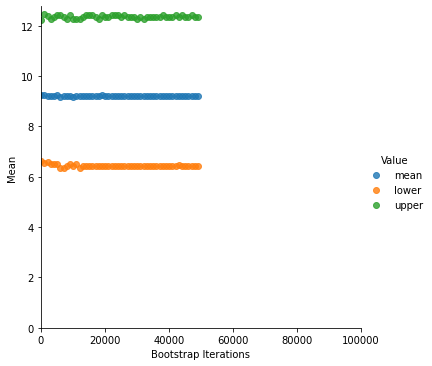

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  sample =np.random.choice(sample, size = [n_bootstraps, sample_size], replace = True) 
  val= []
  data_mean = sample.mean()
    #mean of array
  for i in sample:
    mean = i.mean()
    val.append(mean)    
  b = np.array(val)      
  #lower value= (100-95)/2 = 2.5  
  #upper value= (( 95 +(100-95)/2) = 97.5    
  lower, upper = np.percentile(b, [(100 - ci)/2, ci+(100-ci)/2]) 
  return data_mean, lower, upper
bootstrap_mean_ci(data, data.shape[0],10000, 95)


(9.19505, 6.428571428571429, 12.357142857142858)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


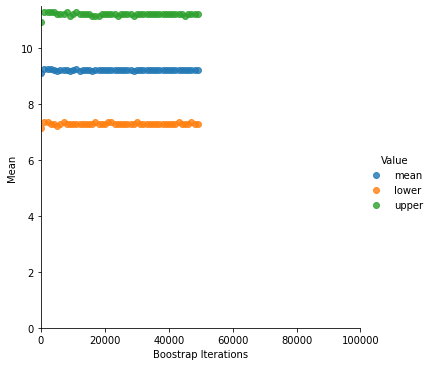

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]
0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fleet, Length: 249, dtype: int64
0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: New Fleet, Length: 79, dtype: float64


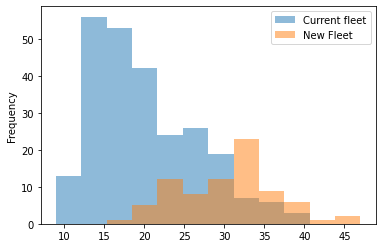

In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# Note: you can add more cells as needed to organise your code and your plots
# <---CODE--->
# Load the data
d = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
print(d)
cf= d['Current fleet']
nf= d['New Fleet']
nf.dropna(inplace=True) #remove the nan values from nf which is a pandas series
d['New Fleet'].dropna(inplace=True) #remove the nan values in the new fleet column in the dataframe
print(cf)
print(nf)

sd= d.plot.hist(bins=12, alpha=0.5)


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
cfmean= cf.mean() #mean of current fleet array
print( "Current fleet mean", cfmean)
nfmean= nf.mean() #mean of current fleet array
print( "New fleet mean",nfmean)

Bs_cf = bootstrap_mean_ci(cf, cf.shape[0] ,10000,95)  #bootstrap function with 10000 bootstrap iterations and CI=95%
Bs_cfmean =Bs_cf[0]   #returns the first element which is the mean
Bs_nf = bootstrap_mean_ci(nf, nf.shape[0] ,10000,95)  #bootstrap function with 10000 bootstrap iterations and CI=95%
Bs_nfmean = Bs_nf[0]
t_obs = Bs_nfmean- Bs_cfmean     #observed difference, t_obs = mean(new fleet) - mean(old fleet)

print("Bootstrapped curent fleet mean",Bs_cfmean)
print("Bootstrap of curent fleet",Bs_cf)
print("Bootstrap of New fleet",Bs_nf)
print("Bootstrapped New fleet mean",Bs_nfmean)
print("observed difference, t_obs: ", t_obs)

Current fleet mean 20.14457831325301
New fleet mean 30.481012658227847
Bootstrapped curent fleet mean 20.139413253012048
Bootstrap of curent fleet (20.139413253012048, 19.369477911646587, 20.92379518072289)
Bootstrap of New fleet (30.484006329113924, 29.139240506329113, 31.848101265822784)
Bootstrapped New fleet mean 30.484006329113924
observed difference, t_obs:  10.344593076101877


In [ ]:

# Create your own function for a permutation test here (you will need it for the lab quiz!):
#The function returns P value
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    count=0
    concat = np.concatenate((sample1,sample2)) #concatenate both arrays
    for i in range(n_permutations):
      perm = np.random.permutation(concat) #create random permutations
      pcf = perm[0:len(sample1)]  #divide the perm to 2 arrays with respective sizes
      pnf = perm[-len(sample2):]

      #find the mean of perm values
      pcfmean = pcf.mean()
      pnfmean = pnf.mean()

      #Find t_perm
      t_perm= pnfmean-pcfmean  
 
      #Find the number of times t_perm>t_obs 
      if t_perm>t_obs:
        count+=1
      pvalue = count/ n_permutations  #calculate pvalue

      #print("permuted array is",'\n',perm,'\n')
      #print("count of cf", len(sample1),'\n')
      #print("count of nf",len(sample2))
      #print("permuted current fleet is",pcf,'\n')
      #print("permuted new fleet is",pnf,'\n')
      #print("permuted cf length",len(pcf))
      #print("permuted nf length",len(pnf))
      #print("Permuted current fleet mean",pcfmean)
      #print("Permuted new fleet mean",pnfmean)
      #print("t_perm:", t_perm, '\n\n')
      #print("t_obs: ", t_obs)
    return pvalue
    
permut_test(cf, nf, 10000)


0.0